In [2]:
#데이터 구성 : Series, DataFrame
import pandas as pd
#데이터시각화
import matplotlib.pyplot as plt
import matplotlib

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: F1 Score, ROC Curve, AUC\
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [3]:
%matplotlib inline
matplotlib.rc('font', family ='Malgun Gothic')

In [4]:
df = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/HMEQ.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
# JOB의 결측치를 "Othre"로 대체
df['JOB'].fillna("Other", inplace=True)

# 다른 결측치의 경우 평균으로 대체
df.fillna(df.mean(), inplace=True)

In [6]:
df_raw_dummy = pd.get_dummies(df)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)
df_raw_y=df_raw_dummy['BAD']

In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size {}".format(df_test_x.shape))
print("test data Y size {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size (1125, 18)
test data Y size (1125,)


In [9]:
model =['DecisionTree', 'RandomForest','GradientBoosing', 'NeuralNet']

train_accuracy=[]; test_accuracy=[]
model_f1_score=[]
model_auc=[]

In [10]:
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


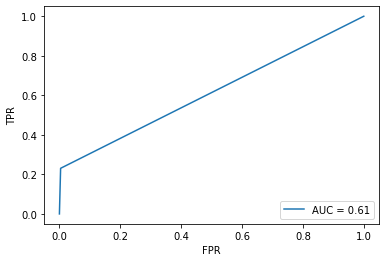

In [11]:
plt.plot(fpr, tpr, label ="AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [12]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [13]:
rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=20, n_estimators = 100, random_state= 1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

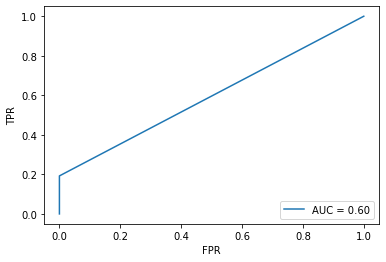

In [14]:
plt.plot(fpr, tpr, label ="AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [15]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [16]:
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators = 100,learning_rate=0.1, random_state= 1234)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

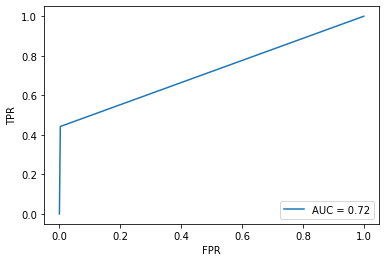

In [17]:
plt.plot(fpr, tpr, label ="AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [18]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [19]:
nn_model = MLPClassifier(hidden_layer_sizes = (80,80), activation="relu", solver="adam", random_state=1234)
nn_model.fit(df_train_x, df_train_y)

train_accuracy.append(nn_model.score(df_train_x, df_train_y))
test_accuracy.append(nn_model.score(df_test_x, df_test_y))

y_pred = nn_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

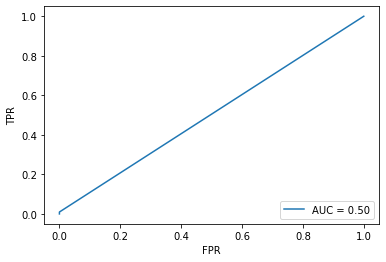

In [20]:
plt.plot(fpr, tpr, label ="AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("TPR");plt.xlabel("FPR")
plt.show()

In [21]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [22]:
df_eval = pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval["AUC"] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.927,0.925,0.323,0.596
GradientBoosing,0.977,0.946,0.601,0.720
NeuralNet,0.910,0.908,0.019,0.505


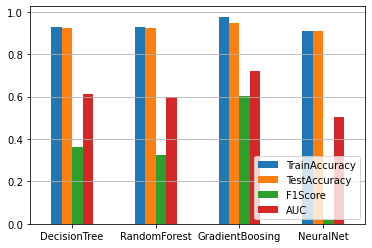

In [23]:
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis = "y")